In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                sep=";")

In [75]:
# create categorical variablle
df["Alcohol Level"] = pd.cut(df.alcohol, 3, labels=["Low", "Medium", "High"])
df["Quality Level"] = pd.cut(df.quality, 4, labels=["Low", "Average", "Above Average", "Excellent"])

## Choose one variable and plot that variable four different ways

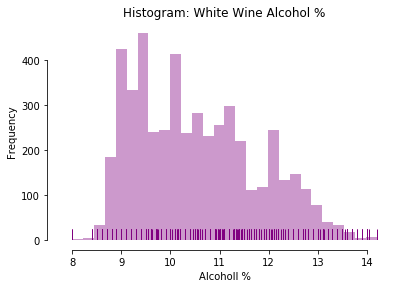

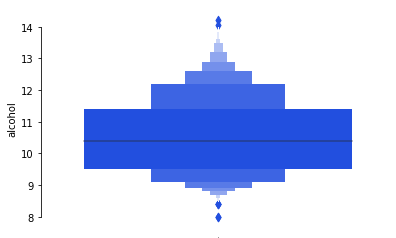

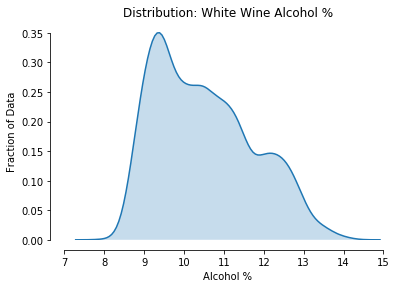

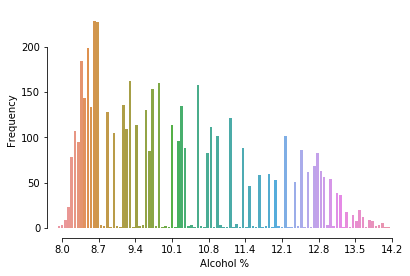

In [51]:
ax = sns.distplot(df.alcohol, kde=False, rug=True, color="purple")
sns.despine(offset=10, trim=True)
plt.title("Histogram: White Wine Alcohol %")
plt.xlabel("Alcoholl %")
plt.ylabel("Frequency")
plt.show()

ax = sns.boxenplot("alcohol", data=df, orient="v", palette="bright")
sns.despine(offset=10, trim=True)
plt.show()

sns.kdeplot(df.alcohol, shade=True, legend=False, )
sns.despine(offset=10, trim=True)
plt.title("Distribution: White Wine Alcohol %")
plt.xlabel("Alcohol %")
plt.ylabel("Fraction of Data")
plt.show()

sns.countplot(df.alcohol)
plt.xticks(np.round(np.linspace(1,103,10),1), np.round(np.linspace(8,14.2,10),1))
plt.xlabel("Alcohol %")
plt.ylabel("Frequency")
sns.despine(offset=10, trim=True)
plt.show()

## Choose two continuous variables, and plot them three different ways.

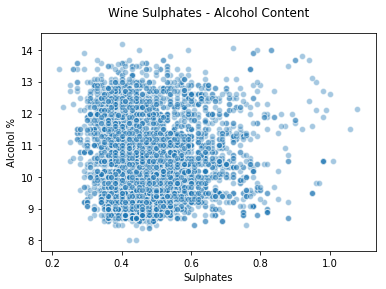

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


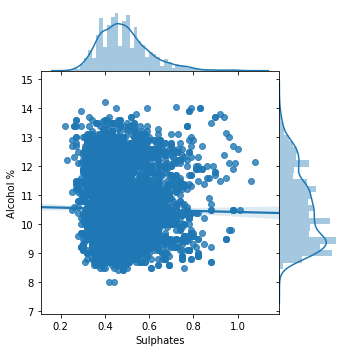

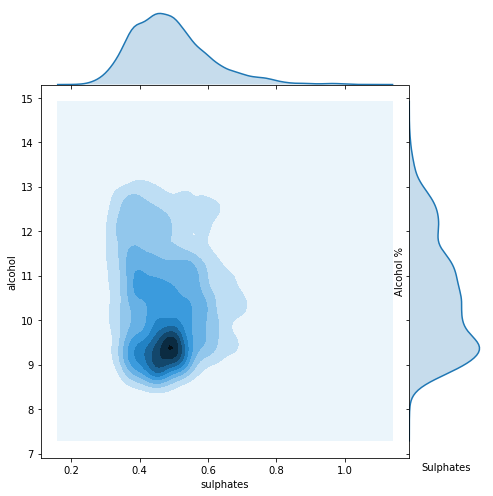

In [72]:
# Scatter Plot
plt.scatter(df[xcol], df[ycol],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol %')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)
plt.show()

# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=df,
                   kind='reg', space=0, size=5, ratio=4)
plt.xlabel('Sulphates')
plt.ylabel('Alcohol %')
plt.show()

sns.jointplot(x=xcol, y=ycol, data=df, kind="kde", height=7, space=0);
plt.xlabel('Sulphates')
plt.ylabel('Alcohol %')
plt.show()

## Choose one continuous variable and one categorical variable, and plot them six different ways.

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

<Figure size 720x864 with 0 Axes>

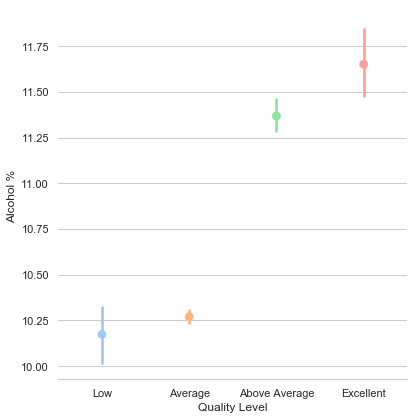

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x864 with 0 Axes>

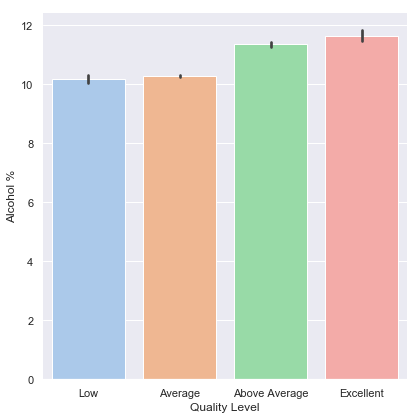

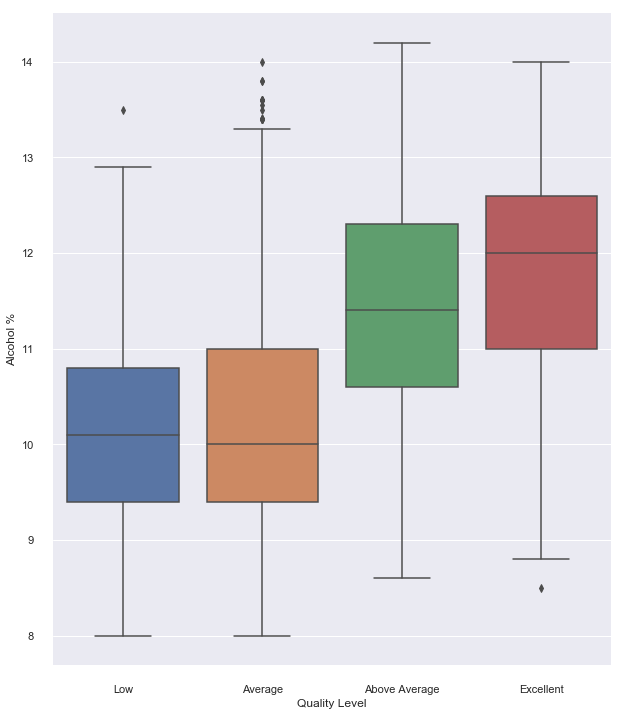

<Figure size 720x864 with 0 Axes>

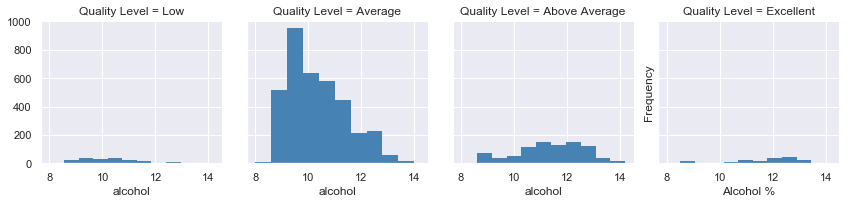

<Figure size 720x864 with 0 Axes>

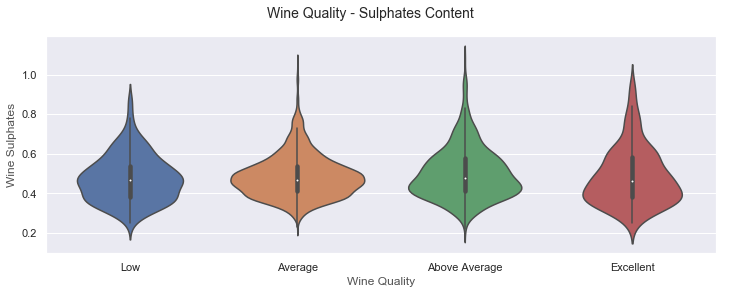

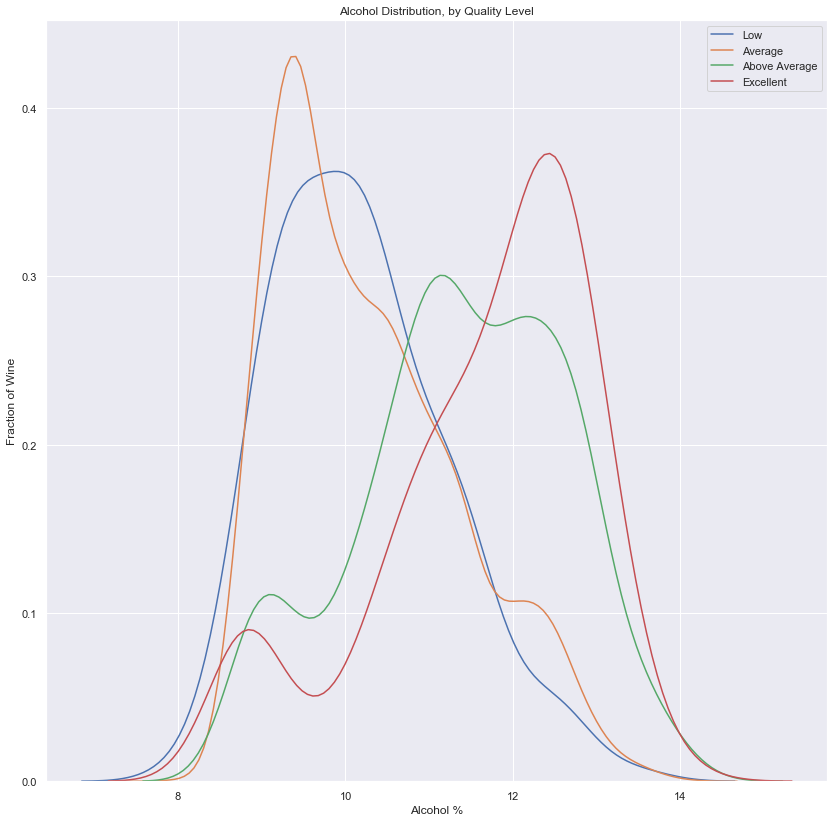

In [182]:
plt.figure(figsize=(10,12))
plt.tight_layout()
sns.set(style="whitegrid")
g = sns.factorplot(x="Quality Level", y="alcohol", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
plt.ylabel("Alcohol %")
g.despine(left=True)
plt.show()

plt.figure(figsize=(10,12))
sns.set(style="darkgrid")
g = sns.factorplot(x="Quality Level", y="alcohol", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
plt.ylabel("Alcohol %")
plt.show()

plt.figure(figsize=(10,12))
ax = sns.boxplot(x='Quality Level',y='alcohol',data=df)
sns.despine(offset=10, trim=True)
plt.ylabel("Alcohol %")
plt.show()

plt.figure(figsize=(10,12))
g = sns.FacetGrid(df, col="Quality Level")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "alcohol", color="steelblue",  lw=0)
sns.despine(trim=True)
plt.xlabel("Alcohol %")
plt.ylabel("Frequency")
plt.show()

# Violin Plots
plt.figure(figsize=(10,12))
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="Quality Level", y="sulphates", data=df,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)
plt.show()

plt.figure(figsize=(14,14))
sns.kdeplot(df[df["Quality Level"] == "Low"].alcohol, label = "Low")
sns.kdeplot(df[df["Quality Level"] == "Average"].alcohol, label = "Average")
sns.kdeplot(df[df["Quality Level"] == "Above Average"].alcohol, label = "Above Average")
sns.kdeplot(df[df["Quality Level"] == "Excellent"].alcohol, label = "Excellent")
plt.xlabel("Alcohol %")
plt.ylabel("Fraction of Wine")
plt.title("Alcohol Distribution, by Quality Level")
plt.show()

## Challenge
### Probability distributions

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


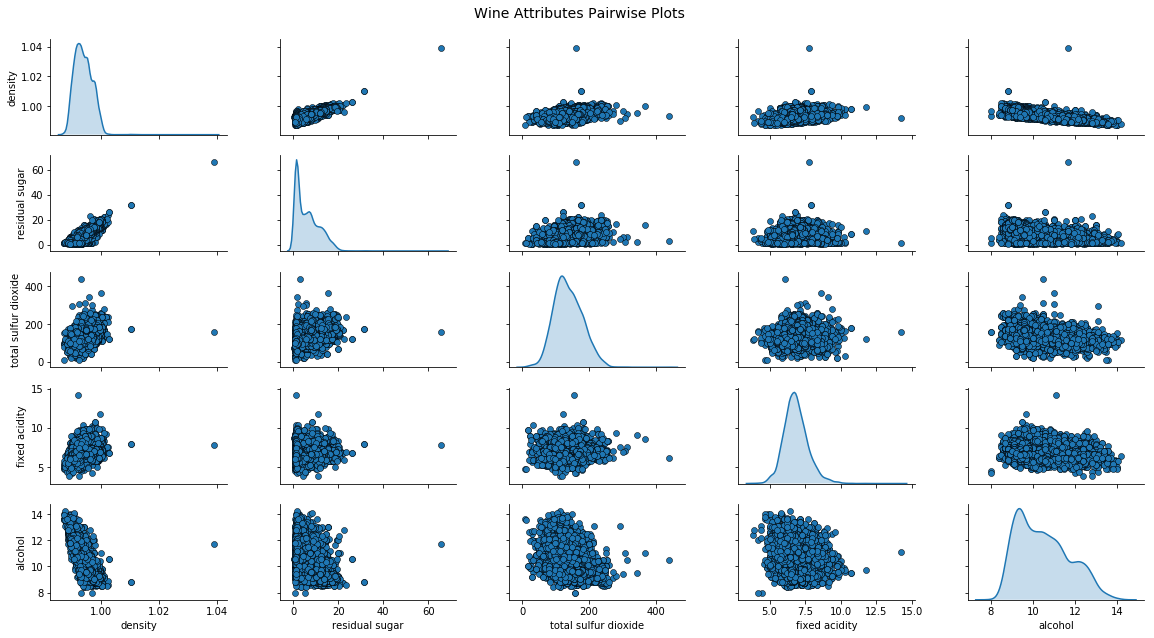

In [56]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'alcohol']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [107]:
def quality_to_color(quality):
    quality_color_dict = {"Low" : "blue", 
                      "Average" : "green", 
                      "Above Average" : "yellow", 
                      "Excellent" : "red"}
    return quality_color_dict[quality]

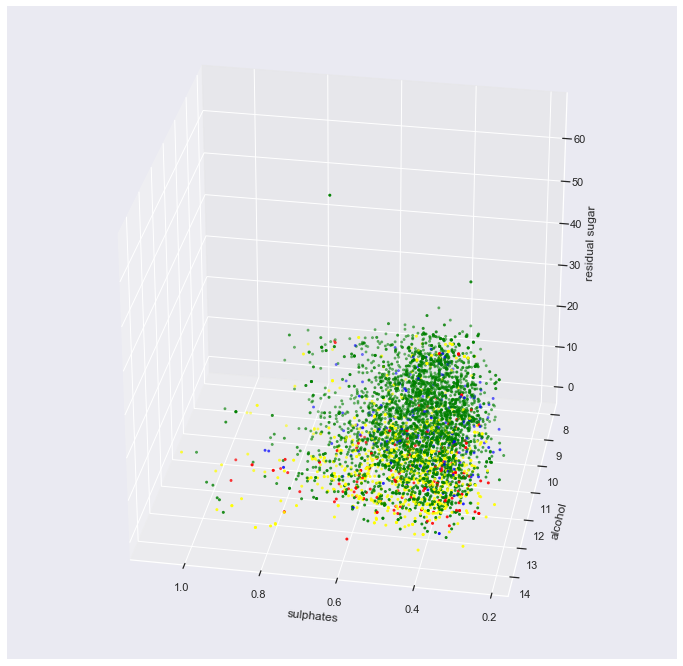

In [184]:
# Dataset 
# plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[xcol], df[ycol], df[zcol], c=df["Quality Level"].apply(quality_to_color), s=4)
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)
ax.set_zlabel(zcol)
ax.view_init(30, 100)
plt.show()